# User Behavior Analysis of the Food Company Application
# Contents <a id='back'></a>

1. Introduction
    
    
2. Data Pra-processing
    * Loading Data
    * Preliminary Exploratory Data
    * Fixing Column Names
    * Checking Data Quality
    * Checking Missing Values
    * Checking Data Duplicate
    * Initial Conclusion
   

3. Data Preparation
    * ICE framework
    * RICE framework


4. Data Analysis
    * Analysis of result of A/B Testing


5. Overall Conclusion

## Introduction

We work at a startup that sells food products and we need to investigate user behavior analysis of the Food Company app with event-based analytical. What we do are:
1. Study the sales funnel.
2. Study the results of the experiment of an A/A/B test. 
    - The users are split into three groups: two control groups get the old fonts and one test group gets the new ones


## Data Pra-processing <a id='intro'></a>
### Loading Data

In [1]:
# Load the required libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from plotly import graph_objects as go
from scipy import stats
import math

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading data files into DataFrames
# Optimize the data for analysis purposes, type column object converted into category

df = pd.read_csv('logs_exp_us.csv', sep='\t', dtype={'EventName': 'category'})

**Description of the data**

File path: *`/datasets/logs_exp_us.csv`*.

Each log entry is a user action or an event.

- *`EventName`* — event name
- *`DeviceIDHash`* — unique user identifier
- *`EventTimestamp`* — event time
- *`ExpId`* — experiment number: 246 and 247 are the control groups, 248 is the test group


**Conclusions**

Each row in the table is a log entry of user action or an event. The columns describe the event itself: EventName, DeviceIDHash, EventTimestamp. While column of ExpId is the code of experiment number: 246 and 247 are the control groups, 248 is the test group.

It is clear that the data we have is sufficient for us to conduct event-based analytical related to user behavior for the company's app.

To continue the analysis, we need to do data pre-processing first.

### Preliminary Exploratory Data

In [3]:
# Show the shape of DataFrame

df.shape

(96712, 4)

In [4]:
# Show the info of DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96712 entries, 0 to 96711
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   EventName       96712 non-null  category
 1   DeviceIDHash    96712 non-null  int64   
 2   EventTimestamp  96711 non-null  float64 
 3   ExpId           96711 non-null  float64 
dtypes: category(1), float64(2), int64(1)
memory usage: 2.3 MB


In [5]:
# Show the data distribution of DataFrame

df.describe()

,DeviceIDHash,EventTimestamp,ExpId
count,9.671200e+04,9.671100e+04,96711.000000
mean,4.688650e+18,1.564729e+09,247.039964
std,2.636513e+18,7.387800e+04,0.819374
min,4.325878e+14,1.564030e+09,246.000000
25%,2.458858e+18,1.564670e+09,246.000000
50%,4.680603e+18,1.564735e+09,247.000000
75%,6.932517e+18,1.564777e+09,248.000000
max,9.222603e+18,1.564844e+09,248.000000


### Fixing Column Names

In [6]:
# Change all column names to lower case and snake_case

df.columns = ['event_name', 'device_id_hash', 'event_timestamp', 'exp_id']

In [7]:
# Look back into the table after fixing the column names

df.head()

,event_name,device_id_hash,event_timestamp,exp_id
0,MainScreenAppear,4575588528974610257,1.564030e+09,246.0
1,MainScreenAppear,7416695313311560658,1.564053e+09,246.0
2,PaymentScreenSuccessful,3518123091307005509,1.564054e+09,248.0
3,CartScreenAppear,3518123091307005509,1.564054e+09,248.0
4,PaymentScreenSuccessful,6217807653094995999,1.564055e+09,248.0


### Conversion Data Type

In [8]:
# Conversion the data type of columns event_timestamp to datetime with new column

df['date_time'] = pd.to_datetime(df['event_timestamp'], unit='s')

In [9]:
# Check our data again after changing the data type

df.dtypes

event_name               category
device_id_hash              int64
event_timestamp           float64
exp_id                    float64
date_time          datetime64[ns]
dtype: object

### Checking Data Quality

In [10]:
# Check the data quality of the event_name column

df['event_name'].value_counts()

MainScreenAppear           46445
OffersScreenAppear         18785
CartScreenAppear           17355
PaymentScreenSuccessful    13587
Tutorial                     540
Name: event_name, dtype: int64

In [11]:
# Check the data quality of the device_id_hash column

df['device_id_hash'].value_counts()

6304868067479728361    2271
4623191541214045580    1713
197027893265565660     1122
7738058666231999878     742
6932517045703054087     688
                       ... 
5674515761085325853       1
8341943701026669290       1
7399061063341528729       1
2606689079105970779       1
432587791671081           1
Name: device_id_hash, Length: 5965, dtype: int64

In [12]:
# Check the data quality of the event_timestamp column

df['event_timestamp'].value_counts()

1.564670e+09    9
1.564671e+09    7
1.564658e+09    7
1.564753e+09    7
1.564665e+09    7
               ..
1.564693e+09    1
1.564693e+09    1
1.564693e+09    1
1.564693e+09    1
1.564844e+09    1
Name: event_timestamp, Length: 70538, dtype: int64

In [13]:
# Check the data quality of the exp_id column

df['exp_id'].value_counts()

248.0    34474
247.0    31628
246.0    30609
Name: exp_id, dtype: int64

### Checking Missing Values

In [14]:
# Check missing values

df.isna().sum()

event_name         0
device_id_hash     0
event_timestamp    1
exp_id             1
date_time          1
dtype: int64

### Checking Duplicate Data


In [15]:
# Checks for duplicate data

df.duplicated().sum()

175

In [16]:
# Remove duplicate data

df = df.drop_duplicates().reset_index(drop=True)

In [17]:
# Checks again after remove duplicate data

df.duplicated().sum()

0

### Initial Conclusion

* Our datasets amounted **244126** rows and **4** columns.
* We change all column names to lower case and snake_case to make analysis easier.
* The *`event_timestamp`* column is changed to datetime type from int64 type, because the column contains date and time.
* There is no missing values.
* There is duplicate data of 413 rows and we remove them.

## Data Preparation

We have to a separate column for date_time.

In [18]:
# Add a date and time column and a separate column for dates

df['date'] = df['date_time'].dt.date

In [19]:
# Conversion the data type of column date to datetime

df['date'] = pd.to_datetime(df['date'])

In [20]:
# Look again at the table after adding the new column

df.head()

,event_name,device_id_hash,event_timestamp,exp_id,date_time,date
0,MainScreenAppear,4575588528974610257,1.564030e+09,246.0,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1.564053e+09,246.0,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1.564054e+09,248.0,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1.564054e+09,248.0,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1.564055e+09,248.0,2019-07-25 11:48:42,2019-07-25


In [21]:
# Look data types of df

df.dtypes

event_name               category
device_id_hash              int64
event_timestamp           float64
exp_id                    float64
date_time          datetime64[ns]
date               datetime64[ns]
dtype: object

## Data Analysis

### How many events are in the logs?

In [22]:
# Calculate how many events are in the logs

total_events = len(df)
print(f'There are {total_events} events are in the logs')

There are 96537 events are in the logs


**Findings:**

- There are 243713 events in the logs.

### How many users are in the logs?

In [23]:
# Look again to the table

df.head()

,event_name,device_id_hash,event_timestamp,exp_id,date_time,date
0,MainScreenAppear,4575588528974610257,1.564030e+09,246.0,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1.564053e+09,246.0,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1.564054e+09,248.0,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1.564054e+09,248.0,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1.564055e+09,248.0,2019-07-25 11:48:42,2019-07-25


In [24]:
# Calculate the device_id_hash column to get the number of users in the logs

total_users = len(df['device_id_hash'].unique())
print(f'There are {total_users} users are in the logs')

There are 5965 users are in the logs


**Findings:**

- There are 7551 users in the logs.

### What's the average number of events per user?

In [25]:
# Calculate the average number of events per user

avg_events = total_events / total_users
print(f'The average number of events per user is {round(avg_events, 0)} users')

The average number of events per user is 16.0 users


**Findings:**

- The average number of events per user is 32 users.

### What period of time does the data cover? 

- Find the maximum and the minimum date.
- Plot a histogram by date and time. 
- Can you be sure that you have equally complete data for the entire period? Older events could end up in some users' logs for technical reasons, and this could skew the overall picture. 
- Find the moment at which the data starts to be complete and ignore the earlier section. 
- What period does the data actually represent?

In [26]:
# Look again to the table df

df.head()

,event_name,device_id_hash,event_timestamp,exp_id,date_time,date
0,MainScreenAppear,4575588528974610257,1.564030e+09,246.0,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1.564053e+09,246.0,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1.564054e+09,248.0,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1.564054e+09,248.0,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1.564055e+09,248.0,2019-07-25 11:48:42,2019-07-25


In [27]:
# Find the maximum and the minimum date

min = df['date_time'].min()
max = df['date_time'].max()

print(f'The first date is {min} and the last date is {max}')

The first date is 2019-07-25 04:43:36 and the last date is 2019-08-03 14:58:44


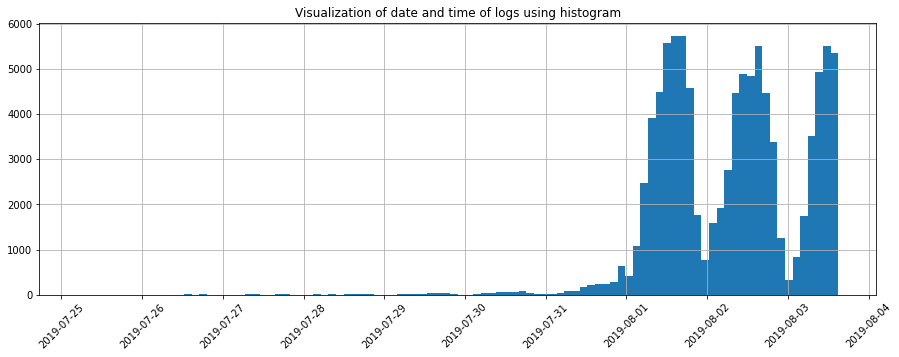

In [28]:
# Visualization

df['date_time'].hist(bins=100, figsize=(15,5))
plt.xticks(rotation = 45);
plt.title('Visualization of date and time of logs using histogram');

In [29]:
# See the distribution date and time

date_dist = df.pivot_table(index='date', values='device_id_hash', aggfunc='count')
date_dist

,device_id_hash
date,
2019-07-25,9
2019-07-26,31
2019-07-27,55
2019-07-28,105
2019-07-29,184
2019-07-30,412
2019-07-31,2030
2019-08-01,36141
2019-08-02,35554


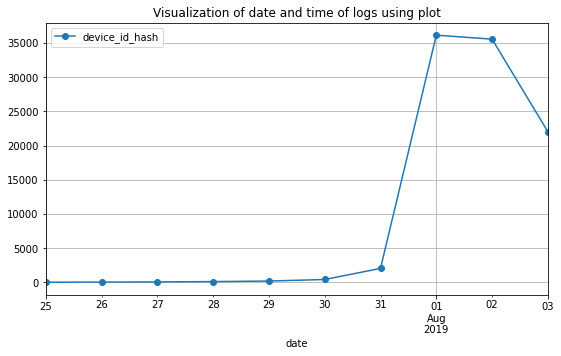

In [30]:
# Visualization

date_dist.plot(style='o-', grid=True, figsize=(9, 5))
plt.title('Visualization of date and time of logs using plot');

In [31]:
# Exclude the older data between 25-31 July 2019

df_filt = df.query('date > "2019-07-31"')

In [32]:
# See the table

df_filt

,event_name,device_id_hash,event_timestamp,exp_id,date_time,date
2826,Tutorial,3737462046622621720,1.564618e+09,246.0,2019-08-01 00:07:28,2019-08-01
2827,MainScreenAppear,3737462046622621720,1.564618e+09,246.0,2019-08-01 00:08:00,2019-08-01
2828,MainScreenAppear,3737462046622621720,1.564618e+09,246.0,2019-08-01 00:08:55,2019-08-01
2829,OffersScreenAppear,3737462046622621720,1.564618e+09,246.0,2019-08-01 00:08:58,2019-08-01
2830,MainScreenAppear,1433840883824088890,1.564618e+09,247.0,2019-08-01 00:08:59,2019-08-01
...,...,...,...,...,...,...
96531,PaymentScreenSuccessful,6528995264794298001,1.564844e+09,246.0,2019-08-03 14:58:32,2019-08-03
96532,CartScreenAppear,6528995264794298001,1.564844e+09,246.0,2019-08-03 14:58:33,2019-08-03
96533,CartScreenAppear,7086945417901847497,1.564844e+09,246.0,2019-08-03 14:58:38,2019-08-03
96534,PaymentScreenSuccessful,7086945417901847497,1.564844e+09,246.0,2019-08-03 14:58:38,2019-08-03


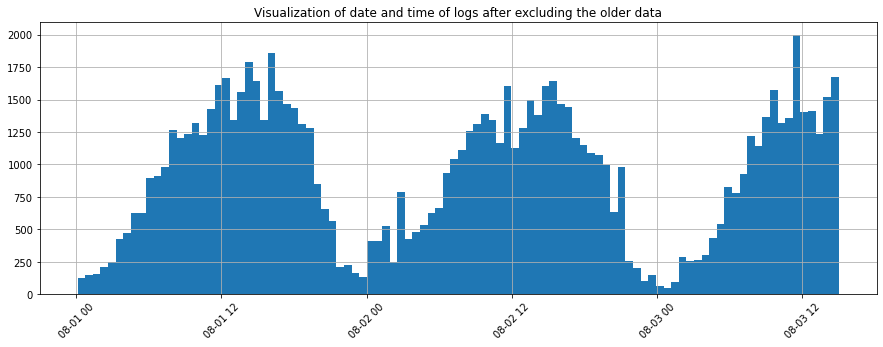

In [33]:
# Visualization

df_filt['date_time'].hist(bins=100, figsize=(15,5))
plt.xticks(rotation = 45);
plt.title('Visualization of date and time of logs after excluding the older data');

**Findings:**
- Data covers the time period between 25 July 2019 through 7 Aug 2019.
- Only data starting 1 August 2019 contains > 3000 rows and is consistent to the last day.

**Insights:**
- Older events could end up in some users' logs for technical reasons, and this could skew the overall picture.
- We can say that August 1, 2019 is the time when the data begins to be complete and actually represents the entire data.

**Recommendations:**
- It is better to exclude the older data between 25-31 July 2019 like we have been done.

### Did you lose many events and users when excluding the older data?

In [34]:
# See the total events and users on the table of df_filt

total_events_filt = len(df_filt)
total_users_filt = len(df_filt['device_id_hash'].unique())
avg_events_filt = total_events / total_users

print(f'There are {total_events_filt} events are in the logs')
print(f'There are {total_users_filt} users are in the logs')
print(f'The average number of events per user is {round(avg_events_filt, 0)} users')

There are 93710 events are in the logs
There are 5764 users are in the logs
The average number of events per user is 16.0 users


In [35]:
# Calculate the difference of events and users on the table of df and df_filt

diff_events = (total_events - total_events_filt) / total_events * 100
diff_users = (total_users - total_users_filt) / total_users * 100

print(f'The percentage of lose events and users are {round(diff_events,2)}% and {round(diff_users,2)}% respectively')

The percentage of lose events and users are 2.93% and 3.37% respectively


**Findings:**
- The percentage of lose events and users are 1.16% and 0.23% respectively.

**Insights:**
- The number of events and users we lose when excluding the older data is not material.

### Make sure you have users from all three experimental groups.


In [36]:
# Check the exp_id column on the table of df_filt

df_filt['exp_id'].value_counts()

248.0    33386
247.0    30638
246.0    29686
Name: exp_id, dtype: int64

**Findings:**
- We have users from all three experimental groups for A/A/B Testing, which are:
    - 79302 of the control group A with number of *`exp_id`* of 246
    - 77022 of the control group A with number of *`exp_id`* of 247
    - 84563 of the testing group B with number of *`exp_id`* of 248

### Conlusion of Data Analysis


- There are 243713 events and 7551 users in the logs.
- The average number of events per user is 32 users.
- Data covers the time period between 25 July 2019 through 7 Aug 2019.
- Only data starting 1 August 2019 contains > 3000 rows and is consistent to the last day. We can say that August 1, 2019 is the time when the data begins to be complete and actually represents the entire data, then we exclude the older data between 25-31 July 2019. 
- After excluding old data, the lost event and user percentages are 1.16% and 0.23%, respectively, which are immaterial.
- We have users from all three experimental groups for A/A/B Testing, which are:
    - 79302 of the control group A with number of *`exp_id`* of 246
    - 77022 of the control group A with number of *`exp_id`* of 247
    - 84563 of the testing group B with number of *`exp_id`* of 248

## Event Funnel Analysis

### See what events are in the logs and their frequency of occurrence

In [37]:
# Calculate how many events in the logs

events_filt = df_filt.groupby(df_filt['event_name']
                        ).count().sort_values(by='device_id_hash', ascending=False)
events_filt.drop(['event_timestamp', 'exp_id', 'date_time', 'date'], axis=1, inplace=True)
events_filt.columns = ['total_logs']
events_filt

,total_logs
event_name,
MainScreenAppear,44633
OffersScreenAppear,18304
CartScreenAppear,16965
PaymentScreenSuccessful,13309
Tutorial,499


**Findings:**

We have five events in the logs, which are:
1. Main Screen Appear of 119101 logs
2. Offers Screen Appear of 46808 logs
3. Cart Screen Appear of 42668 logs
4. Payment Screen Successful of 34118 logs
5. Tutorial of 1018 logs

### The number of users who performed each of these actions

In [38]:
# # Calculate how many users in the logs in each events

users_per_event = df_filt.pivot_table(
    index='event_name', values='device_id_hash', aggfunc='nunique').sort_values(by='device_id_hash', ascending=False)
users_per_event

,device_id_hash
event_name,
MainScreenAppear,5601
OffersScreenAppear,3298
CartScreenAppear,2657
PaymentScreenSuccessful,2486
Tutorial,399


In [39]:
# See the total users on the table of df_filt

total_users_filt = len(df_filt['device_id_hash'].unique())
 
print(f'There are {total_users_filt} users are in the logs')

There are 5764 users are in the logs


In [40]:
# Calculate the proportion of users who performed the action

round((users_per_event / total_users_filt), 2)

,device_id_hash
event_name,
MainScreenAppear,0.97
OffersScreenAppear,0.57
CartScreenAppear,0.46
PaymentScreenSuccessful,0.43
Tutorial,0.07


**Findings:**

We have 7543 users in the logs, with the detail of actions they have performed are:
1. 0.98% of users in the logs has performed on event of Main Screen Appear.
2. 0.61% of users in the logs has performed on event of Offers Screen Appear.
3. 0.50% of users in the logs has performed on event of Cart Screen Appear.
4. 0.47% of users in the logs has performed on event of Payment Screen Successful.
5. 0.11% of users in the logs has performed on event of Tutorial.

### In what order do you think the actions took place. 
- Are all of them part of a single sequence? You don't need to take them into account when calculating the funnel.

In [41]:
# Look again to the table of users_per_event

users_per_event

,device_id_hash
event_name,
MainScreenAppear,5601
OffersScreenAppear,3298
CartScreenAppear,2657
PaymentScreenSuccessful,2486
Tutorial,399


**Insights:**
- Of the 5 events in the log, in our opinion the sequence of events starts from the Main Screen event when the user first visits the application, followed by clicking the Offers Screen menu, then clicking Cart Screen, and finally Payment Screen Successful to complete the order. Meanwhile, Tutorial events are unrelated to the sequence of events.

**Recommendations:**
- We will exclude Tutorials for further analysis.

### Use the event funnel to find the percentage of users that proceed from each stage to the next. 
- For instance, for the sequence of events A → B → C, calculate the ratio of users at stage B to the number of users at stage A and the ratio of users at stage C to the number at stage B.

In [42]:
# Exclude Tutorials event from the users_per_event

user_funnel = users_per_event[:-1]
user_funnel

,device_id_hash
event_name,
MainScreenAppear,5601
OffersScreenAppear,3298
CartScreenAppear,2657
PaymentScreenSuccessful,2486


In [43]:
# Visualization of funnel

user_funnel_vis = user_funnel.reset_index() #for visualization needs
fig = go.Figure(go.Funnel(
    y = user_funnel_vis['event_name'],
    x = user_funnel_vis['device_id_hash']
    ))
fig.show()

Before we calculate the ratio of users that proceed from each stage to the next, firstly we change positions of the total logs.

In [44]:
# We change positions of the total logs

user_funnel.shift()

,device_id_hash
event_name,
MainScreenAppear,NaN
OffersScreenAppear,5601.0
CartScreenAppear,3298.0
PaymentScreenSuccessful,2657.0


In [45]:
# Calculates the ratio of sequence users from the first event to the next event to the last

ratio = round((user_funnel / user_funnel.shift()).fillna(1), 2)
ratio

,device_id_hash
event_name,
MainScreenAppear,1.00
OffersScreenAppear,0.59
CartScreenAppear,0.81
PaymentScreenSuccessful,0.94


**Findings:**
- The ratio of users to clicking the Offers Screen is 62% once they are on the Home Screen.
- The ratio of users to adding products to the Cart Screen is 81% after they click on the Offer Screen.
- The ratio of users to complete payments is 95% of users who add products to Cart.

### At what stage do you lose the most users?

In [46]:
# Look again to the table of ratio

ratio

,device_id_hash
event_name,
MainScreenAppear,1.00
OffersScreenAppear,0.59
CartScreenAppear,0.81
PaymentScreenSuccessful,0.94


**Insight:**
- We lost most of our users at the Offers Screen stage of 48%, i.e. only 62% of users clicked on Offers from their first Home Screen.

### What percentage of users make the entire journey from their first event to payment?

In [47]:
# Look again to the table of users_per_event

users_per_event

,device_id_hash
event_name,
MainScreenAppear,5601
OffersScreenAppear,3298
CartScreenAppear,2657
PaymentScreenSuccessful,2486
Tutorial,399


In [48]:
# Calculate the percentage of users make the entire journey from their first event to payment

percent = ((users_per_event.loc['PaymentScreenSuccessful'] / users_per_event.loc['MainScreenAppear']
           )['device_id_hash']) * 100

print(f'The percentage of users who make the entire journey from the first event to the checkout stage is \
{round(percent, 2)}%')

The percentage of users who make the entire journey from the first event to the checkout stage is 44.38%


**Findings:**
- The percentage of users who make the entire journey from the first event to the checkout stage is 47.7%.

**Insights:**
- We cannot assume that 47.7% is good or not because there is no data comparison from other months.

### Conclusion of Event Funnel Analysis

- We have five events in the logs, which are:
    1. Main Screen Appear of 119101 logs
    2. Offers Screen Appear of 46808 logs
    3. Cart Screen Appear of 42668 logs
    4. Payment Screen Successful of 34118 logs
    5. Tutorial of 1018 logs
    
    
- We have 7543 users in the logs, with the detail of actions they have performed are:
    1. 0.98% of users in the logs has performed on event of Main Screen Appear.
    2. 0.61% of users in the logs has performed on event of Offers Screen Appear.
    3. 0.50% of users in the logs has performed on event of Cart Screen Appear.
    4. 0.47% of users in the logs has performed on event of Payment Screen Successful.
    5. 0.11% of users in the logs has performed on event of Tutorial. 


- Of the 5 events in the log, in our opinion the sequence of events starts from the Main Screen event when the user first visits the application, followed by clicking the Offers Screen menu, then clicking Cart Screen, and finally Payment Screen Successful to complete the order. Meanwhile, Tutorial events are unrelated to the sequence of events. 
- Then, we exclude Tutorials for further analysis.


- The ratio of users to clicking the Offers Screen is 62% once they are on the Home Screen.
- The ratio of users to adding products to the Cart Screen is 81% after they click on the Offer Screen.
- The ratio of users to complete payments is 95% of users who add products to Cart.
- We lost most of our users at the Offers Screen stage of 48%, i.e. only 62% of users clicked on Offers from their first Home Screen.


- The percentage of users who make the entire journey from the first event to the checkout stage is 47.7%. We cannot assume that is good or not because there is no data comparison from other months.

## Analysis of Experimental Results

### How many users are there in each group?

In [49]:
# Look again to the table of df_filt

df_filt.head()

,event_name,device_id_hash,event_timestamp,exp_id,date_time,date
2826,Tutorial,3737462046622621720,1.564618e+09,246.0,2019-08-01 00:07:28,2019-08-01
2827,MainScreenAppear,3737462046622621720,1.564618e+09,246.0,2019-08-01 00:08:00,2019-08-01
2828,MainScreenAppear,3737462046622621720,1.564618e+09,246.0,2019-08-01 00:08:55,2019-08-01
2829,OffersScreenAppear,3737462046622621720,1.564618e+09,246.0,2019-08-01 00:08:58,2019-08-01
2830,MainScreenAppear,1433840883824088890,1.564618e+09,247.0,2019-08-01 00:08:59,2019-08-01


In [50]:
# Grouping unique users of each group

user_per_group = df_filt.pivot_table(index='exp_id', values='device_id_hash', aggfunc='nunique')
user_per_group

,device_id_hash
exp_id,
246.0,1894
247.0,1951
248.0,1919


**Findings:**
- There are 2484 users in group 246, 2513 users in group 247 and 2537 users in group 248.

### We have two control groups in A/A testing, where we check our mechanics and calculations. 
- See if there is a statistically significant difference between samples 246 and 247.

**Formulation of Hypothesis testing**

- The significance level / "alpha" value to be used = 0.01
- We will use the Z-Test Statistics approach.
- Ho = The proportion between group samples was statistically the same (=)
- H1 = the proportion between group samples was statistically significant not the same (/=)

In [51]:
# Define a formula for check a statistically significant difference between group samples

def check_hypothesis(successes1, successes2, trials1, trials2, alpha=0.01):
    # proportion of successes in the first group:
    p1 = successes1/trials1

    # proportion of successes in the second group:
    p2 = successes2/trials2

    # proportion of successes in the combined dataset:
    p_combined = (successes1 + successes2) / (trials1 + trials2)

    # difference in proportions in datasets
    difference = p1 - p2

    # calculate statistics in standard deviations of the standard normal distribution
    z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1/trials1 + 1/trials2))

    # set standard normal distribution (mean 0, standard deviation 1)
    distr = stats.norm(0, 1)

    # calculate statistics in standard deviations of the standard normal distribution
    z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1/trials1 + 1/trials2))


    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print('p-value: ', p_value)

    if (p_value < alpha):
        print("Reject the null hypothesis: there is a significant difference between the shares")
    else:
        print("Failed to reject the null hypothesis, there is no reason to consider the shares different")

**Insights:**
- To answer this question, we will examine statistically significant differences between sample groups in the following question.

### Select the most popular events. 
- In each control group, find the number of users who performed the action. Find the percentage. 
- Check whether the differences between groups are statistically significant. 
- Repeat this procedure for all other events (it will save time if you can create a custom function to perform this test).
- Can you confirm if the groups are properly split?

In [52]:
# Look again to the table of df_filt

df_filt.head()

,event_name,device_id_hash,event_timestamp,exp_id,date_time,date
2826,Tutorial,3737462046622621720,1.564618e+09,246.0,2019-08-01 00:07:28,2019-08-01
2827,MainScreenAppear,3737462046622621720,1.564618e+09,246.0,2019-08-01 00:08:00,2019-08-01
2828,MainScreenAppear,3737462046622621720,1.564618e+09,246.0,2019-08-01 00:08:55,2019-08-01
2829,OffersScreenAppear,3737462046622621720,1.564618e+09,246.0,2019-08-01 00:08:58,2019-08-01
2830,MainScreenAppear,1433840883824088890,1.564618e+09,247.0,2019-08-01 00:08:59,2019-08-01


In [53]:
# Grouping unique users of each events per group

user_events_per_group = df_filt.pivot_table(index='event_name',
                                            values='device_id_hash', 
                                            columns='exp_id', 
                                            aggfunc='nunique')
user_events_per_group

exp_id,246.0,247.0,248.0
event_name,,,
CartScreenAppear,891,885,881
MainScreenAppear,1842,1889,1870
OffersScreenAppear,1099,1102,1097
PaymentScreenSuccessful,845,813,828
Tutorial,133,140,126


In [54]:
# Statistic test of samples 246 and 247

check_hypothesis(user_events_per_group.loc['MainScreenAppear', 246],
                 user_events_per_group.loc['MainScreenAppear', 247],
                 user_per_group.loc[246],
                 user_per_group.loc[247],
                )

p-value:  [0.42941573]
Failed to reject the null hypothesis, there is no reason to consider the shares different


**Findings:**
- Based on hypothesis testing above, there is no statistically significant difference between samples 246 and 247.

In [55]:
# Define a formula for check a statistically significant difference between event of each group samples

def check_event_hypothesis(user_events_per_group, user_per_group, event_name, exp1, exp2):
    frac1 = user_events_per_group.loc[event_name, exp1] / user_per_group.loc[exp1]
    frac2 = user_events_per_group.loc[event_name, exp2] / user_per_group.loc[exp2]
    print (f'{frac1} event {event_name} group {exp1}')
    print (f'{frac2} event {event_name} group {exp2}')
    check_hypothesis(user_events_per_group.loc[event_name, exp1],
                     user_events_per_group.loc[event_name, exp2],
                     user_per_group.loc[exp1],
                     user_per_group.loc[exp2],
                    )

In [56]:
# Calculate a statistically significant difference between event of each group samples of Testing Group
# Testing Group are no. 246 and 247

for event_name in user_events_per_group.index:
    check_event_hypothesis(user_events_per_group, user_per_group,
                           event_name, 246, 247)
    print()

device_id_hash    0.470433
Name: 246.0, dtype: float64 event CartScreenAppear group 246
device_id_hash    0.453614
Name: 247.0, dtype: float64 event CartScreenAppear group 247
p-value:  [0.29562302]
Failed to reject the null hypothesis, there is no reason to consider the shares different

device_id_hash    0.972545
Name: 246.0, dtype: float64 event MainScreenAppear group 246
device_id_hash    0.968221
Name: 247.0, dtype: float64 event MainScreenAppear group 247
p-value:  [0.42941573]
Failed to reject the null hypothesis, there is no reason to consider the shares different

device_id_hash    0.580253
Name: 246.0, dtype: float64 event OffersScreenAppear group 246
device_id_hash    0.564839
Name: 247.0, dtype: float64 event OffersScreenAppear group 247
p-value:  [0.33407857]
Failed to reject the null hypothesis, there is no reason to consider the shares different

device_id_hash    0.446146
Name: 246.0, dtype: float64 event PaymentScreenSuccessful group 246
device_id_hash    0.416709
Name

**Conclusion:**
- Based on hypothesis testing above, there is no statistically significant difference between samples 246 and 247.

### Do the same for the group of users who are shown the new font version . Compare the results with each control group for each event separately. Compare the results with the combined results for the control group. What conclusions can you draw from the experiment?

In [57]:
# Calculate a statistically significant difference between event of group samples 246 vs. 248
# Control Group of 246 vs. Testing Group of 248 

for event_name in user_events_per_group.index:
    check_event_hypothesis(user_events_per_group, user_per_group,
                           event_name, 246, 248)
    print()

device_id_hash    0.470433
Name: 246.0, dtype: float64 event CartScreenAppear group 246
device_id_hash    0.459093
Name: 248.0, dtype: float64 event CartScreenAppear group 248
p-value:  [0.48270864]
Failed to reject the null hypothesis, there is no reason to consider the shares different

device_id_hash    0.972545
Name: 246.0, dtype: float64 event MainScreenAppear group 246
device_id_hash    0.974466
Name: 248.0, dtype: float64 event MainScreenAppear group 248
p-value:  [0.71187764]
Failed to reject the null hypothesis, there is no reason to consider the shares different

device_id_hash    0.580253
Name: 246.0, dtype: float64 event OffersScreenAppear group 246
device_id_hash    0.571652
Name: 248.0, dtype: float64 event OffersScreenAppear group 248
p-value:  [0.59101891]
Failed to reject the null hypothesis, there is no reason to consider the shares different

device_id_hash    0.446146
Name: 246.0, dtype: float64 event PaymentScreenSuccessful group 246
device_id_hash    0.431475
Name

In [58]:
# Calculate a statistically significant difference between event of group samples 247 vs. 248
# Control Group of 247 vs. Testing Group of 248 

for event_name in user_events_per_group.index:
    check_event_hypothesis(user_events_per_group, user_per_group,
                           event_name, 247, 248)
    print()

device_id_hash    0.453614
Name: 247.0, dtype: float64 event CartScreenAppear group 247
device_id_hash    0.459093
Name: 248.0, dtype: float64 event CartScreenAppear group 248
p-value:  [0.73220997]
Failed to reject the null hypothesis, there is no reason to consider the shares different

device_id_hash    0.968221
Name: 247.0, dtype: float64 event MainScreenAppear group 247
device_id_hash    0.974466
Name: 248.0, dtype: float64 event MainScreenAppear group 248
p-value:  [0.24457102]
Failed to reject the null hypothesis, there is no reason to consider the shares different

device_id_hash    0.564839
Name: 247.0, dtype: float64 event OffersScreenAppear group 247
device_id_hash    0.571652
Name: 248.0, dtype: float64 event OffersScreenAppear group 248
p-value:  [0.6687672]
Failed to reject the null hypothesis, there is no reason to consider the shares different

device_id_hash    0.416709
Name: 247.0, dtype: float64 event PaymentScreenSuccessful group 247
device_id_hash    0.431475
Name:

**Conclusion:**
- Based on hypothesis testing above, there is no statistically significant difference between Control Group of 246 vs. Testing Group of 248 and Control Group of 247 vs. Testing Group of 248.

### What level of significance did you set to test the statistical hypothesis mentioned above? 
- Count how many statistical hypothesis tests you have done.
- At a statistical significance level of 0.1, one in 10 results could be wrong.
- What level of significance should be set? If you want to change it, just rerun the previous step and check your conclusions.

**Summary:**
- The significance level / "alpha" value did we set to test the statistical hypothesis mentioned above is 0.01.
- The statistical hypothesis tests we have done are 3 tests, which are:
    1. The two control groups in A/A testing, no. 246 vs. 247
    2. The control group A no. 246 vs. the testing group no. 248
    3. The control group A no. 247 vs. the testing group no. 248

#### What level of significance should be set? If you want to change it, just rerun the previous step and check your conclusions.

We will change the significance level / "alpha" value to test the statistical hypothesis by 0.05 and rerun the previous step and check our conclusions.

**Formulation of Hypothesis testing**

- The significance level / "alpha" value to be used = 0.05
- We will use the Z-Test Statistics approach.
- Ho = The proportion between group samples was statistically the same (=)
- H1 = the proportion between group samples was statistically significant not the same (/=)

In [59]:
# Define a formula for check a statistically significant difference between group samples

def check_hypothesis2(successes1, successes2, trials1, trials2, alpha=0.05):
    # proportion of successes in the first group:
    p1 = successes1/trials1

    # proportion of successes in the second group:
    p2 = successes2/trials2

    # proportion of successes in the combined dataset:
    p_combined = (successes1 + successes2) / (trials1 + trials2)

    # difference in proportions in datasets
    difference = p1 - p2

    # calculate statistics in standard deviations of the standard normal distribution
    z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1/trials1 + 1/trials2))

    # set standard normal distribution (mean 0, standard deviation 1)
    distr = stats.norm(0, 1)

    # calculate statistics in standard deviations of the standard normal distribution
    z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1/trials1 + 1/trials2))


    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print('p-value: ', p_value)

    if (p_value < alpha):
        print("Reject the null hypothesis: there is a significant difference between the shares")
    else:
        print("Failed to reject the null hypothesis, there is no reason to consider the shares different")

In [60]:
# Statistic test of samples 246 and 247

check_hypothesis2(user_events_per_group.loc['MainScreenAppear', 246],
                 user_events_per_group.loc['MainScreenAppear', 247],
                 user_per_group.loc[246],
                 user_per_group.loc[247],
                )

p-value:  [0.42941573]
Failed to reject the null hypothesis, there is no reason to consider the shares different


In [61]:
# Define a formula for check a statistically significant difference between event of each group samples

def check_event_hypothesis2(user_events_per_group, user_per_group, event_name, exp1, exp2):
    frac1 = user_events_per_group.loc[event_name, exp1] / user_per_group.loc[exp1]
    frac2 = user_events_per_group.loc[event_name, exp2] / user_per_group.loc[exp2]
    print (f'{frac1} event {event_name} group {exp1}')
    print (f'{frac2} event {event_name} group {exp2}')
    check_hypothesis(user_events_per_group.loc[event_name, exp1],
                     user_events_per_group.loc[event_name, exp2],
                     user_per_group.loc[exp1],
                     user_per_group.loc[exp2],
                    )

In [62]:
# Calculate a statistically significant difference between event of each group samples of Testing Group
# Testing Group are no. 246 and 247

for event_name in user_events_per_group.index:
    check_event_hypothesis2(user_events_per_group, user_per_group,
                           event_name, 246, 247)
    print()

device_id_hash    0.470433
Name: 246.0, dtype: float64 event CartScreenAppear group 246
device_id_hash    0.453614
Name: 247.0, dtype: float64 event CartScreenAppear group 247
p-value:  [0.29562302]
Failed to reject the null hypothesis, there is no reason to consider the shares different

device_id_hash    0.972545
Name: 246.0, dtype: float64 event MainScreenAppear group 246
device_id_hash    0.968221
Name: 247.0, dtype: float64 event MainScreenAppear group 247
p-value:  [0.42941573]
Failed to reject the null hypothesis, there is no reason to consider the shares different

device_id_hash    0.580253
Name: 246.0, dtype: float64 event OffersScreenAppear group 246
device_id_hash    0.564839
Name: 247.0, dtype: float64 event OffersScreenAppear group 247
p-value:  [0.33407857]
Failed to reject the null hypothesis, there is no reason to consider the shares different

device_id_hash    0.446146
Name: 246.0, dtype: float64 event PaymentScreenSuccessful group 246
device_id_hash    0.416709
Name

In [63]:
# Calculate a statistically significant difference between event of group samples 246 vs. 248
# Control Group of 246 vs. Testing Group of 248 

for event_name in user_events_per_group.index:
    check_event_hypothesis2(user_events_per_group, user_per_group,
                           event_name, 246, 248)
    print()

device_id_hash    0.470433
Name: 246.0, dtype: float64 event CartScreenAppear group 246
device_id_hash    0.459093
Name: 248.0, dtype: float64 event CartScreenAppear group 248
p-value:  [0.48270864]
Failed to reject the null hypothesis, there is no reason to consider the shares different

device_id_hash    0.972545
Name: 246.0, dtype: float64 event MainScreenAppear group 246
device_id_hash    0.974466
Name: 248.0, dtype: float64 event MainScreenAppear group 248
p-value:  [0.71187764]
Failed to reject the null hypothesis, there is no reason to consider the shares different

device_id_hash    0.580253
Name: 246.0, dtype: float64 event OffersScreenAppear group 246
device_id_hash    0.571652
Name: 248.0, dtype: float64 event OffersScreenAppear group 248
p-value:  [0.59101891]
Failed to reject the null hypothesis, there is no reason to consider the shares different

device_id_hash    0.446146
Name: 246.0, dtype: float64 event PaymentScreenSuccessful group 246
device_id_hash    0.431475
Name

In [64]:
# Calculate a statistically significant difference between event of group samples 247 vs. 248
# Control Group of 247 vs. Testing Group of 248 

for event_name in user_events_per_group.index:
    check_event_hypothesis2(user_events_per_group, user_per_group,
                           event_name, 247, 248)
    print()

device_id_hash    0.453614
Name: 247.0, dtype: float64 event CartScreenAppear group 247
device_id_hash    0.459093
Name: 248.0, dtype: float64 event CartScreenAppear group 248
p-value:  [0.73220997]
Failed to reject the null hypothesis, there is no reason to consider the shares different

device_id_hash    0.968221
Name: 247.0, dtype: float64 event MainScreenAppear group 247
device_id_hash    0.974466
Name: 248.0, dtype: float64 event MainScreenAppear group 248
p-value:  [0.24457102]
Failed to reject the null hypothesis, there is no reason to consider the shares different

device_id_hash    0.564839
Name: 247.0, dtype: float64 event OffersScreenAppear group 247
device_id_hash    0.571652
Name: 248.0, dtype: float64 event OffersScreenAppear group 248
p-value:  [0.6687672]
Failed to reject the null hypothesis, there is no reason to consider the shares different

device_id_hash    0.416709
Name: 247.0, dtype: float64 event PaymentScreenSuccessful group 247
device_id_hash    0.431475
Name:

**Conclusion:**
- After change the significance level / "alpha" value to test the statistical hypothesis by 0.05 and rerun the previous step, based on hypothesis testing above, there is no statistically significant difference between Control Group of 246 vs. Testing Group of 248 and Control Group of 247 vs. Testing Group of 248.
- There was no statistically significant difference in our data whether we tested it using a significance level/alpha value of 0.01 or 0.05.

### Conclusion of Analysis of Experimental Results

- There are 2484 users in group 246, 2513 users in group 247 and 2537 users in group 248.
- On the hypothesis testing:
    1. Firstly, we set the test of statistical significance level hypothesis/alpha value is 0.01.
    2. Secondly, we re run the testing with the test of statistical significance level hypothesis/alpha value is 0.05.
    3. The statistical hypothesis tests we have done are 3 tests times 2 (alpha value 0.01 and 0.05), which are:
        - The two control groups in A/A testing, no. 246 vs. 247
        - The control group A no. 246 vs. the testing group no. 248
        - The control group A no. 247 vs. the testing group no. 248
    4. The results of the two tests were that there was no statistically significant difference between the Control Group 246 vs. Testing Group 248 and the Control Group 247 vs. Testing Group 248.
    5. Means, there was no statistically significant difference in our data whether we tested it using a significance level/alpha value of 0.01 or 0.05.

## Overall Conlusion

**In the Data Pra-processing Section:**
* Our datasets amounted **244126** rows and **4** columns.
* We change all column names to lower case and snake_case to make analysis easier.
* The *`event_timestamp`* column is changed to datetime type from int64 type, because the column contains date and time.
* There is no missing values.
* There is duplicate data of 413 rows and we remove them.


**In the Data Analysis Section:**
- There are 243713 events and 7551 users in the logs.
- The average number of events per user is 32 users.
- Data covers the time period between 25 July 2019 through 7 Aug 2019.
- Only data starting 1 August 2019 contains > 3000 rows and is consistent to the last day. We can say that August 1, 2019 is the time when the data begins to be complete and actually represents the entire data, then we exclude the older data between 25-31 July 2019. 
- After excluding old data, the lost event and user percentages are 1.16% and 0.23%, respectively, which are immaterial.
- We have users from all three experimental groups for A/A/B Testing, which are:
    - 79302 of the control group A with number of *`exp_id`* of 246
    - 77022 of the control group A with number of *`exp_id`* of 247
    - 84563 of the testing group B with number of *`exp_id`* of 248


**In the Event Funnel Analysis Section:**
- We have five events in the logs, which are:
    1. Main Screen Appear of 119101 logs
    2. Offers Screen Appear of 46808 logs
    3. Cart Screen Appear of 42668 logs
    4. Payment Screen Successful of 34118 logs
    5. Tutorial of 1018 logs
    
    
- We have 7543 users in the logs, with the detail of actions they have performed are:
    1. 0.98% of users in the logs has performed on event of Main Screen Appear.
    2. 0.61% of users in the logs has performed on event of Offers Screen Appear.
    3. 0.50% of users in the logs has performed on event of Cart Screen Appear.
    4. 0.47% of users in the logs has performed on event of Payment Screen Successful.
    5. 0.11% of users in the logs has performed on event of Tutorial. 


- Of the 5 events in the log, in our opinion the sequence of events starts from the Main Screen event when the user first visits the application, followed by clicking the Offers Screen menu, then clicking Cart Screen, and finally Payment Screen Successful to complete the order. Meanwhile, Tutorial events are unrelated to the sequence of events. 
- Then, we exclude Tutorials for further analysis.


- The ratio of users to clicking the Offers Screen is 62% once they are on the Home Screen.
- The ratio of users to adding products to the Cart Screen is 81% after they click on the Offer Screen.
- The ratio of users to complete payments is 95% of users who add products to Cart.
- We lost most of our users at the Offers Screen stage of 48%, i.e. only 62% of users clicked on Offers from their first Home Screen.


- The percentage of users who make the entire journey from the first event to the checkout stage is 47.7%. We cannot assume that is good or not because there is no data comparison from other months.


**In the Analysis of Experimental Results Section:**
- There are 2484 users in group 246, 2513 users in group 247 and 2537 users in group 248.
- On the hypothesis testing:
    1. Firstly, we set the test of statistical significance level hypothesis/alpha value is 0.01.
    2. Secondly, we re run the testing with the test of statistical significance level hypothesis/alpha value is 0.05.
    3. The statistical hypothesis tests we have done are 3 tests times 2 (alpha value 0.01 and 0.05), which are:
        - The two control groups in A/A testing, no. 246 vs. 247
        - The control group A no. 246 vs. the testing group no. 248
        - The control group A no. 247 vs. the testing group no. 248
    4. The results of the two tests were that there was no statistically significant difference between the Control Group 246 vs. Testing Group 248 and the Control Group 247 vs. Testing Group 248.
    5. Means, there was no statistically significant difference in our data whether we tested it using a significance level/alpha value of 0.01 or 0.05.